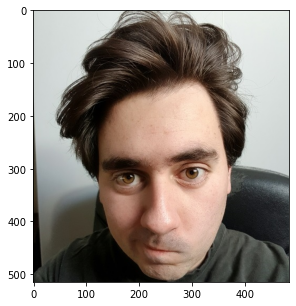

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
#image = cv2.imread('1_3_Types_of_Features_Image_Segmentation/images/monarch.jpg')
image = cv2.imread('1_3_Types_of_Features_Image_Segmentation/images/mifoto.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

f, ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(image_copy)

### Prepare data for k-means

In [34]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

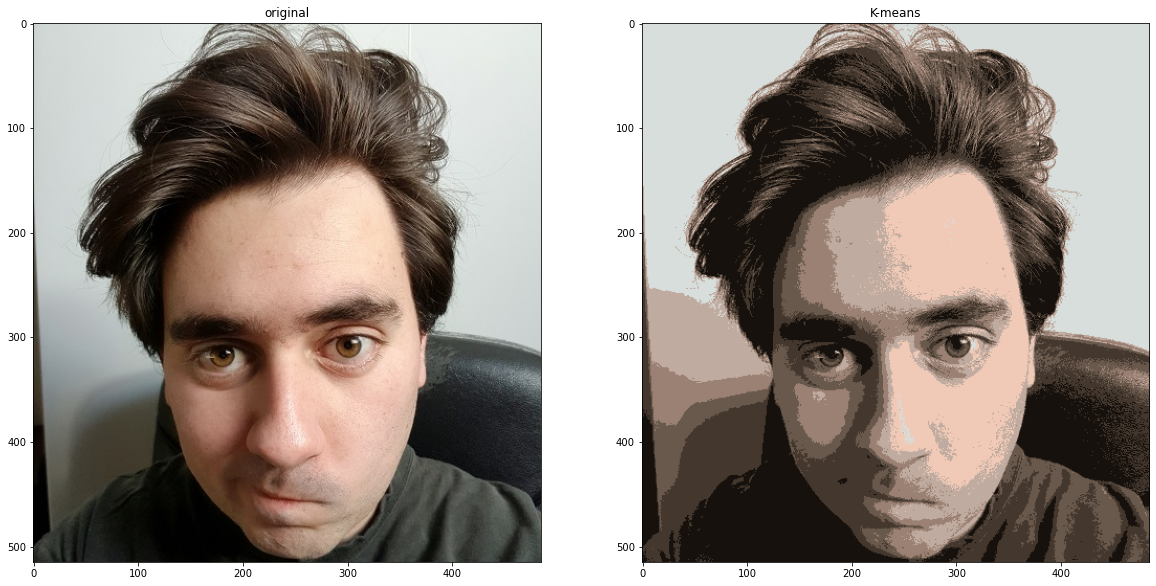

In [41]:
# Define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)

# Perform k-means clustering
k = 7
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape(image_copy.shape)
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))

ax1.set_title('original')
ax1.imshow(image_copy)

ax2.set_title('K-means')
ax2.imshow(segmented_image)

segmented_image_save = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
cv2.imwrite( "1_3_Types_of_Features_Image_Segmentation/images/kmeansmifoto.jpg", segmented_image_save );

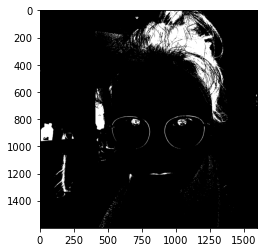

In [29]:
# Visualize one segment

plt.imshow(labels_reshape==0, cmap='gray')

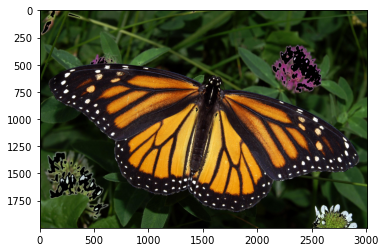

In [24]:
# Mask image segment

masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1] = [0,0,0]

# Display it!
plt.imshow(masked_image)